# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [ ]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(Rtsne): there is no package called ‘Rtsne’


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [43]:
#a and b
scale <- read.csv("wine.csv") %>% mutate(across(-class, ~ as.numeric(scale(.))))
names(scale)

[1] "Alcohol"                       "Malicacid"                    
 [3] "Ash"                           "Alcalinity_of_ash"            
 [5] "Magnesium"                     "Total_phenols"                
 [7] "Flavanoids"                    "Nonflavanoid_phenols"         
 [9] "Proanthocyanins"               "Color_intensity"              
[11] "Hue"                           "X0D280_0D315_of_diluted_wines"
[13] "Proline"                       "class"

In [45]:
#c
glimpse(scale)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 1.51434077, 0.24559683, 0.19632522, 1.68…
$ Malicacid                     <dbl> -0.56066822, -0.49800856, 0.02117152, -0…
$ Ash                           <dbl> 0.23139979, -0.82566722, 1.10621386, 0.4…
$ Alcalinity_of_ash             <dbl> -1.1663032, -2.4838405, -0.2679823, -0.8…
$ Magnesium                     <dbl> 1.90852151, 0.01809398, 0.08810981, 0.92…
$ Total_phenols                 <dbl> 0.8067217, 0.5670481, 0.8067217, 2.48443…
$ Flavanoids                    <dbl> 1.0319081, 0.7315653, 1.2121137, 1.46239…
$ Nonflavanoid_phenols          <dbl> -0.6577078, -0.8184106, -0.4970050, -0.9…
$ Proanthocyanins               <dbl> 1.22143845, -0.54318872, 2.12995937, 1.0…
$ Color_intensity               <dbl> 0.251008784, -0.292496232, 0.268262912, …
$ Hue                           <dbl> 0.3611585, 0.4049085, 0.3174085, -0.4263…
$ X0D280_0D315_of_diluted_wines <dbl> 1.84272147, 1.11031723, 0.78636920, 1.18…
$ Proline         

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [14]:
#a)

library(tidyverse)
library(dplyr)

scale <- read.csv("wine.csv") %>% mutate(across(-class, ~ as.numeric(scale(.))))
head(scale)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939,1
2,0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635,1
3,0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370,1
4,1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680,1
5,0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747,1
6,1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072,1


b)
PCA is more sensitive to how the variables are scaled because they are based on varience. If we do not scale, then variables that have much larger vaules or very small values may dominate and impact the data unfavorably and dominate some of the principal componets. When you scale and center the data, then each variable has a mean of 0 which allows the data to be centered on varience and not values which goes hand in hand with PCA principals.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [17]:
#a
pca <- prcomp(scale %>% dplyr::select(-class), center = FALSE, scale. = FALSE)
summary(pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

b)
The function summary(pca) shows the user the proportion of variance and cumulative proportion for each principal component. PC1 impacts 36.2% of the whole varience and PC2 impacts 19.21% of the whole varience


c)
We are doing PCA first because it helps us understand how much of our data impacts the overall data and helps us see our data in a more organized manner. PCA helps clean our data and simplifys it and aids in seeing the maximum variation and the areas in data where our data points spread out the most

d) A rotation matrix tells us how much of the data contributes to each principal component and shows the user through the rows which are the original variables and the collumns which are the PCs



In [18]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


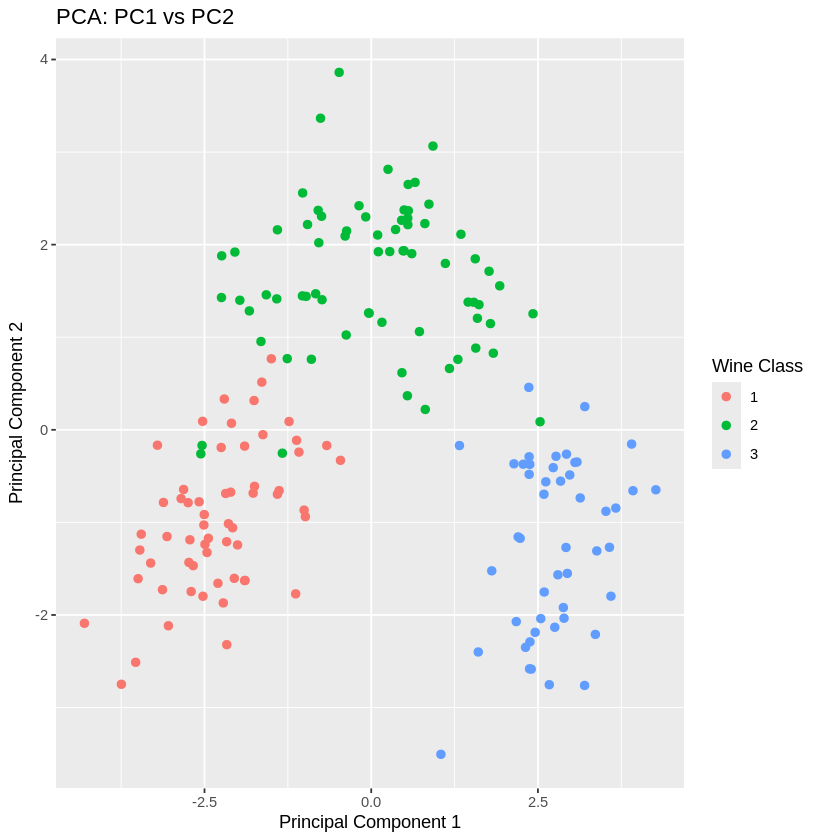

In [31]:
#e
library(dplyr)
library(ggplot2)

plot <- as.data.frame(pca$x) %>%
  select(PC1, PC2) %>%
  mutate(class = scale$class)

ggplot(plot, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 2) +
  labs(title = "PC1 vs PC2",
       x = "Principal Component 1",
       y = "Principal Component 2",
       color = "Wine Class")

f)
From the graph we can see that PC2 seperates class 2 from class 1 and 3, and we can see that PC1 seperates class 1 and 3 as well, more noticibly comapred to PC2. All three groups have a distinct seperatation with minimal overlap. This is to be expected because PC1 and PC2 are responsible for 55.4% of the varience within the data. In the context of the data, this seperation means that the wines from these classes, are chemically different which the PCA revealed.

g)
An example where a PCA would fail would be when there is only one degree of variation. For example if here is only a radius, which can be seen from the example from class.

h)
A vector space is when there are a set number of elements that align with an axis which then has a rotation applied to each element which ends up becoming vectors. The vector space has vectors defined within a certain scope, however vectors can be restrictive because there can be all types of data and we must be able to combine certain pairs. A manifold is a set which has the property that it resembles locally  as a vector space which can help us make certain data fields not defined gloabally and allows us to combine certain data like height and weight.

PCA assumes that your plane is mostly flat whereas t-sne looks at the data more locally and is better with non-linear manifolds which show any clusters that a linear model may miss

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



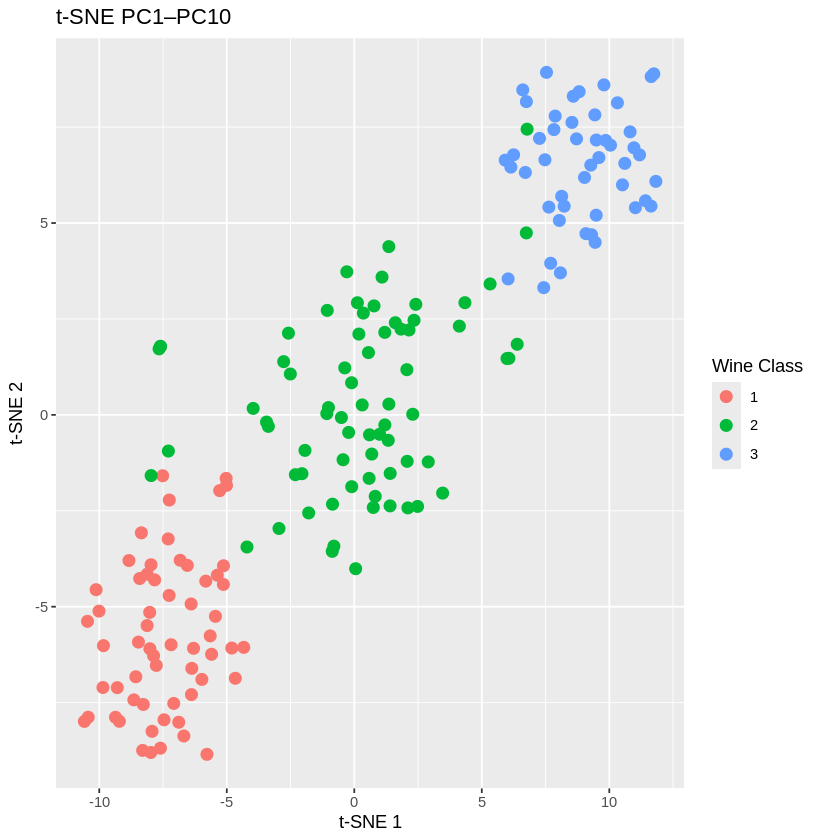

In [41]:
#a
library(dplyr)
library(ggplot2)
install.packages("Rtsne")
library(Rtsne)

pca_scores <-as.data.frame(pca$x)
pcs <-paste0("PC", 1:min(10, ncol(pca_scores)))

tsne <- pca_scores %>%
  select(all_of(pcs)) %>%
  mutate(class = scale$class) %>%
  distinct(across(all_of(pcs)), .keep_all = TRUE)

set.seed(123)
tsne_fit <- Rtsne(
  as.matrix(tsne %>% select(all_of(pcs))),
  dims = 2,
  perplexity = perp,
  theta = 0.5,
  max_iter = 1000,
  pca = FALSE,
  )

  tsne_df <- as.data.frame(tsne_fit$Y) %>%
  setNames(c("tSNE1", "tSNE2")) %>%
  mutate(class = tsne$class)

ggplot(tsne_df, aes(x = tSNE1, y = tSNE2, color = factor(class))) +
  geom_point(size = 3) +
  labs(title = "t-SNE PC1–PC10",
       x = "t-SNE 1", y = "t-SNE 2", color = "Wine Class")

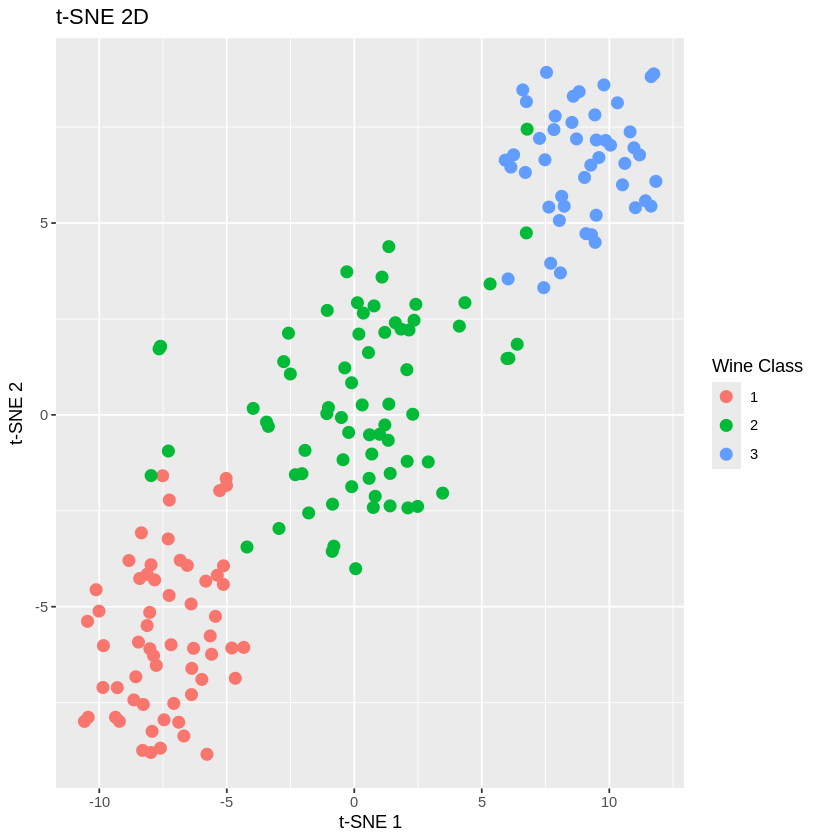

In [39]:
#b
library(tibble)
library(dplyr)
library(ggplot2)

tsne_2d <- as_tibble(tsne_fit$Y)
names(tsne_2d) <- c("tSNE1", "tSNE2")

tsne_2d <- tsne_2d %>%
  mutate(class = scale$class)

ggplot(tsne_df, aes(x = tSNE1, y = tSNE2, color = factor(class))) +
  geom_point(size = 2) +
  labs(title = "t-SNE 2D",
       x = "t-SNE 1", y = "t-SNE 2", color = "Wine Class")

c)
t-SNE is good for visualization whereas PCA is good for preprocessing or dimensionality reduction. Additionally, t-sne helps with quicker interpretation, giving more distint visual clusters to the user. If we wanted to look at the visual differences between the groups, we can do so through a t-SNE.  

d)
This type of workflow would be really helpful in lab specifically with gene and protein expression. In the lab I work in, we do a lot of data analyisis with the amount of fibrosis and other heart disease markers within mice hearts. We can use t-SNE to better visualize the different gene/protein markers in the heart. Additionally, PCA can help with de cluttering some of the data which can reveal significant new clusters that were crowded by random data points